# Working with data with a regression example

In [27]:
# Use this link for managing conda environemnts
# https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
#
# conda create -n uitnn python=3.12
# conda activate uitnn
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126
# pip3 install scipy scikit-learn ipython
# pip install opencv-python matplotlib seaborn
# pip install tensorflow[and-cuda]
# ------------------ Although pytorch/TF are not required for now it is good to check them
# > python
# import tensorflow as tf
# tf.test.is_gpu_available()
# tf.test.is_gpu_available(cuda_only=True)
#
# import torch
# torch.cuda.is_available()


from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

## Generate sample data

In [28]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape)
print(y.shape)

print(X[:3])
print(y[:20])
print(set(y))

(569, 30)
(569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
{np.int

## Visualize data

<Axes: ylabel='Count'>

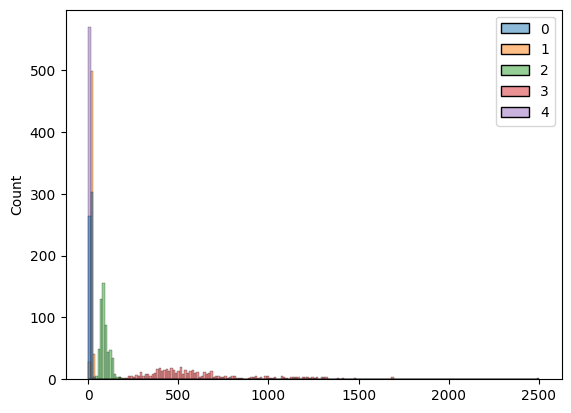

In [29]:
sns.histplot(data=X[:, :5])

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


## Fit regression model

In [31]:
# Create a Perceptron model
clf = Perceptron(max_iter=1000, eta0=0.1)
# Train the model
clf.fit(X_train, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,0


In [32]:
# Make predictions
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


## Model overfitting

In [33]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.935672514619883


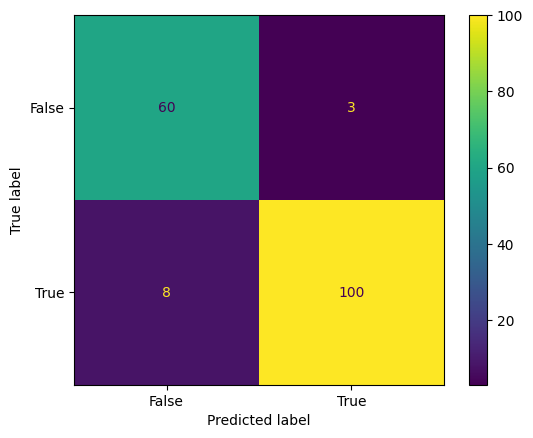

In [34]:
# Calculate confusion matrix
from matplotlib import pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Multiclass Classification using Perceptron

## Load data samples and plot

In [35]:
from sklearn.datasets import fetch_openml


In [36]:
# Load the MNIST dataset
from sklearn.datasets import load_digits

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(int)
print(X.shape)
print(y.shape)
print(y[:10])

(70000, 784)
(70000,)
0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: int64


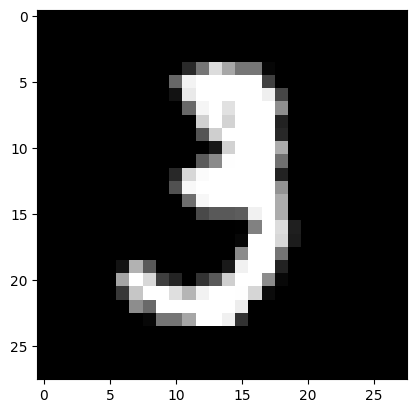

In [37]:
X_img = X.to_numpy().reshape((70000,28,28))/255.0
plt.imshow(X_img[10,:,:], interpolation='nearest', cmap='gray')
plt.show()


## Add noise to data

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Create a Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.1)
# Train the model
perceptron.fit(X_train, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,0


In [40]:
# Make predictions
y_pred = perceptron.predict(X_test)
print(y_pred)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[8 4 8 ... 2 9 5]
Accuracy: 0.8764285714285714


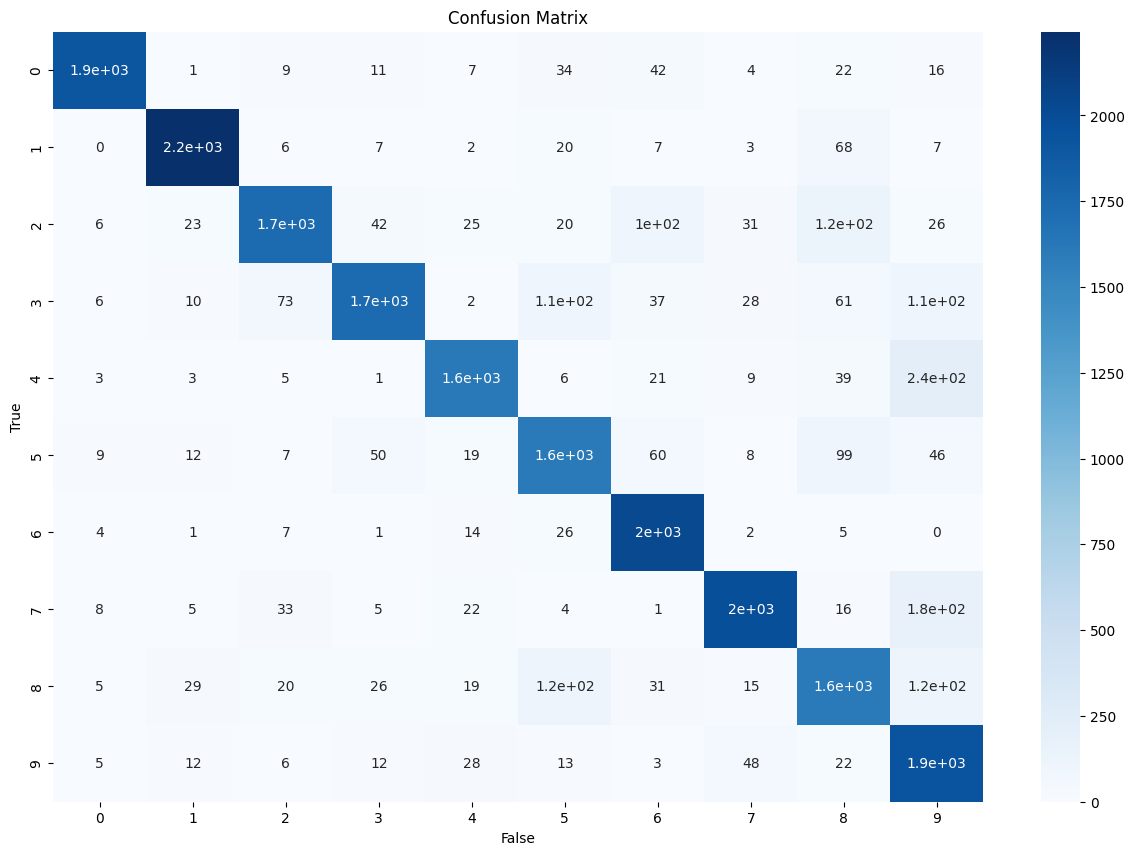

In [41]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues')
plt.ylabel('True')
plt.xlabel('False')
plt.title('Confusion Matrix')
plt.show()